# Useful references

## Python + Numpy + Matplotlib + etc.

* Python Numpy Tutorial: http://cs231n.github.io/python-numpy-tutorial/
* Computational Statistics in Python: http://people.duke.edu/~ccc14/sta-663-2017/
* Numpy for MATLAB users: https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html
* MATLAB synonymous commands in Python/NumPy: http://mathesaurus.sourceforge.net/
* Effectively using matplotlib: https://pbpython.com/effective-matplotlib.html


## NEURON (with Python)
* NEURON documentation: https://www.neuron.yale.edu/neuron/static/py_doc/index.html
* NEURON + Python tutorial: https://neuron.yale.edu/neuron/docs/scripting-neuron-basics


# 1. Current clamp simulation on a passive pyramidal neuron

Here we demonstrate how to run a current clamp simulation with a passive pyramidal neuron for the second home work. First, we begin by importing a module `libcell` and constructs a pyramidal cell in NEURON

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui
import libcell

In [2]:
cell = libcell.L23()

	0 
	1 
	1 
	1 
	1 


In [3]:
h.psection()

soma { nseg=7  L=9.26604  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=29.7838}
	insert pas { g_pas=0.000142857 e_pas=-75}
}


1.0

Here we load a session file for the virtual current clamp experiment:

In [4]:
h.xopen("iclamp.ses")

nrn_define_shape: soma first and last 3-d point at same (x,y)


1.0

Loading this session embeds a current clamp electrode `h.IClamp[0]`, whose parameters are:

In [5]:
print('Activation onset = {} ms\nDuration = {} ms\nAmplitude = {} nA'.format(
        h.IClamp[0].delay, h.IClamp[0].dur, h.IClamp[0].amp))

Activation onset = 50.0 ms
Duration = 150.0 ms
Amplitude = 0.1 nA


You can control the location and parameters via the "PointProcessManager" window. Now let's run simulation while recording the membrane potential at soma.

In [6]:
def run(tstop=300):
    """runs a simulation and returns the membrane potential recording at the soma."""
    dt = 0.1 # Again we use 10kHz sampling rate, e.g. 0.1 ms interval
    vrec = h.Vector() # The recording will be save in this vector
    vrec.record(cell.soma(0.5)._ref_v, dt)
    
    h.tstop = tstop  # Set how long the simulation will run.
    h.init()
    h.run()
    
    return vrec.c() # Should return a copy of the vector


Let's collect multiple recordings in a list and also make a note about where the electrode was. First, we prepare two empty lists, one for voltage recordings and the other for electrode-to-soma distance:

In [7]:
# Reset lists
vrecs = []
distances = []

# Set the origin to cell.soma(0) 
# See https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/topology/geometry.html#distance
h.distance(sec=cell.soma) 

0.0

In [8]:
result = run()
vrecs.append(result)

# Measure a distance to the origin from the electrode
distances.append(
    h.distance(h.IClamp[0].get_segment())
) 
print("Number of simulations ran =", len(vrecs))

Number of simulations ran = 1


[Text(0, 0.5, 'Voltage (mV)'), Text(0.5, 0, 'time (ms)')]

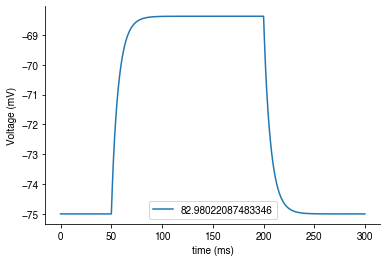

In [9]:
fig,ax = plt.subplots()

t = np.arange(3000)*0.1 # Remember that we use 10kHz for a sampling rate
for v in vrecs:
    ax.plot(t, v)
ax.legend(distances)
ax.set(xlabel='time (ms)', ylabel='Voltage (mV)')

## * How to locate and move point processes

* Help for point processes: https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html

### 1. How to find out the electrode location

`PointProcess.get_segment()` returns the segment that a point process is located.

In [10]:
sec = h.IClamp[0].get_segment()
sec

dend4_1121(0.357143)

Now we can measure the distance between any section(0) to this electrode using `h.distance`. For example,

In [11]:
h.distance(sec=cell.soma) # Set an origin to cell.soma(0)
h.distance(h.IClamp[0].get_segment()) # Measure a distance to the origin from the electrode

82.98022087483346

### 2. How to find and get a particular section/segment

Here's how find all sections and segments in our `cell`:
* `h.allsec()` yields an iterator to go through all the sections in a model,
* Given a section, say `sec`, `sec.allseg()` yields an iterator for all segments in `sec`,
* If we know a particular location in terms of the relative coordinate `x`, we can use `sec(x)`,

Here is an example of going through all segments in a model with showing their distance to the soma:

In [12]:
print('segment , distance')
for sec in h.allsec():
    for seg in sec.allseg():
        segname = '{}({})'.format(sec.name(), seg.x)
        h.distance(sec=cell.soma)
        print(segname, ',', h.distance(seg))

segment , distance
dend1_1(0.0) , 9.266039848327637
dend1_1(0.07142857142857142) , 9.568883488604104
dend1_1(0.21428571428571427) , 10.17457076915704
dend1_1(0.35714285714285715) , 10.780258049709976
dend1_1(0.5) , 11.385945330262912
dend1_1(0.6428571428571429) , 11.991632610815849
dend1_1(0.7857142857142857) , 12.597319891368784
dend1_1(0.9285714285714286) , 13.203007171921719
dend1_1(1.0) , 13.505850812198187
dend1_11(0.0) , 13.505850812198187
dend1_11(0.07142857142857142) , 14.081184123631715
dend1_11(0.21428571428571427) , 15.23185074649877
dend1_11(0.35714285714285715) , 16.382517369365825
dend1_11(0.5) , 17.53318399223288
dend1_11(0.6428571428571429) , 18.683850615099935
dend1_11(0.7857142857142857) , 19.83451723796699
dend1_11(0.9285714285714286) , 20.98518386083404
dend1_11(1.0) , 21.56051717226757
dend1_111(0.0) , 21.56051717226757
dend1_111(0.07142857142857142) , 22.27148950377046
dend1_111(0.21428571428571427) , 23.693434166776242
dend1_111(0.35714285714285715) , 25.11537882

dend2_121211(0.35714285714285715) , 210.52680765175114
dend2_121211(0.5) , 223.7116027065561
dend2_121211(0.6428571428571429) , 236.8963977613611
dend2_121211(0.7857142857142857) , 250.0811928161661
dend2_121211(0.9285714285714286) , 263.26598787097106
dend2_121211(1.0) , 269.8583853983735
dend2_121212(0.0) , 177.5648200147387
dend2_121212(0.07142857142857142) , 183.2539758911217
dend2_121212(0.21428571428571427) , 194.6322876438877
dend2_121212(0.35714285714285715) , 206.01059939665367
dend2_121212(0.5) , 217.38891114941967
dend2_121212(0.6428571428571429) , 228.76722290218567
dend2_121212(0.7857142857142857) , 240.14553465495163
dend2_121212(0.9285714285714286) , 251.52384640771766
dend2_121212(1.0) , 257.21300228410064
dend2_12122(0.0) , 168.0546953060602
dend2_12122(0.07142857142857142) , 173.87197512790533
dend2_12122(0.21428571428571427) , 185.5065347715956
dend2_12122(0.35714285714285715) , 197.14109441528583
dend2_12122(0.5) , 208.7756540589761
dend2_12122(0.6428571428571429) ,

dend3_1212222222(0.0) , 233.803953717147
dend3_1212222222(0.07142857142857142) , 238.75958875935626
dend3_1212222222(0.21428571428571427) , 248.67085884377482
dend3_1212222222(0.35714285714285715) , 258.58212892819336
dend3_1212222222(0.5) , 268.49339901261186
dend3_1212222222(0.6428571428571429) , 278.40466909703036
dend3_1212222222(0.7857142857142857) , 288.3159391814489
dend3_1212222222(0.9285714285714286) , 298.22720926586743
dend3_1212222222(1.0) , 303.1828443080767
dend3_12122222221(0.0) , 303.1828443080767
dend3_12122222221(0.07142857142857142) , 303.9156760995009
dend3_12122222221(0.21428571428571427) , 305.38133968234933
dend3_12122222221(0.35714285714285715) , 306.84700326519777
dend3_12122222221(0.5) , 308.3126668480462
dend3_12122222221(0.6428571428571429) , 309.7783304308946
dend3_12122222221(0.7857142857142857) , 311.243994013743
dend3_12122222221(0.9285714285714286) , 312.70965759659146
dend3_12122222221(1.0) , 313.44248938801564
dend3_12122222222(0.0) , 303.182844308076

`PointProcess.loc(segment)` moves the point process to a given segment.

### 3. Example: How to find a segment in `cell` by a name and move our electrode to it.

In [13]:
sec_to_find, = [sec for sec in cell.dends if sec.name()=='dend2_121']
sec_to_find

dend2_121

In [14]:
segs = [seg for seg in sec_to_find.allseg()]
segs

[dend2_121(0),
 dend2_121(0.0714286),
 dend2_121(0.214286),
 dend2_121(0.357143),
 dend2_121(0.5),
 dend2_121(0.642857),
 dend2_121(0.785714),
 dend2_121(0.928571),
 dend2_121(1)]

Then, we move our `IClamp` to the third segment,

In [15]:
h.IClamp[0].loc(segs[2])

0.21428571428571427

Or, we can move it to a middle segment of the section,

In [16]:
h.IClamp[0].loc(sec_to_find(0.5))

0.5

### 4. How to access variables in sections

You can access a variable defined in a section by (section).(variable name). Also, you can change its value by assignment. It is also possible to access/change a variable only for a segment, if a relative coordinate `x` for the segment is known, by (section)(x).(variable name).

In the following example, we go through all the sections in the model and print the name, `g_pas` (conductance parameter of the passive mechanism), and `nseg`. 

In [17]:
for sec in h.allsec():
    print(sec.name(), sec.g_pas, sec.nseg)

dend1_1 0.00014285714285714287 7
dend1_11 0.00014285714285714287 7
dend1_111 0.00014285714285714287 7
dend1_1111 0.00014285714285714287 7
dend1_1112 0.00014285714285714287 7
dend1_112 0.00014285714285714287 7
dend1_1121 0.00014285714285714287 7
dend1_1122 0.00014285714285714287 7
dend1_12 0.00014285714285714287 7
dend1_121 0.00014285714285714287 7
dend1_1211 0.00014285714285714287 7
dend1_1212 0.00014285714285714287 7
dend1_122 0.00014285714285714287 7
dend1_1221 0.00014285714285714287 7
dend1_1222 0.00014285714285714287 7
dend1_12221 0.00014285714285714287 7
dend1_12222 0.00014285714285714287 7
dend2_1 0.00014285714285714287 7
dend2_11 0.00014285714285714287 7
dend2_111 0.00014285714285714287 7
dend2_1111 0.00014285714285714287 7
dend2_1112 0.00014285714285714287 7
dend2_112 0.00014285714285714287 7
dend2_1121 0.00014285714285714287 7
dend2_1122 0.00014285714285714287 7
dend2_12 0.00014285714285714287 7
dend2_121 0.00014285714285714287 7
dend2_1211 0.00014285714285714287 7
dend2_12111

In [18]:
h.psection()

soma { nseg=7  L=9.26604  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=29.7838}
	insert pas { g_pas=0.000142857 e_pas=-75}
}


1.0

Now let's change `g_pas`, the passive conductance, and check the result.

In [19]:
cell.soma.g_pas = 0.1
h.psection()

soma { nseg=7  L=9.26604  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=29.7838}
	insert pas { g_pas=0.1 e_pas=-75}
}


1.0